# Slides
Click **[here](https://docs.google.com/presentation/d/1EE8kNN6rFtGPurpuF81m-EmkaTBGL2CZ2GQi9BuoNDQ/edit?usp=sharing)** to download the Slides.



In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Load Dependencies

In [53]:

import numpy as np
import torch
from torchvision.io import read_image
import time
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import imutils
from PIL import Image, ImageFilter

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

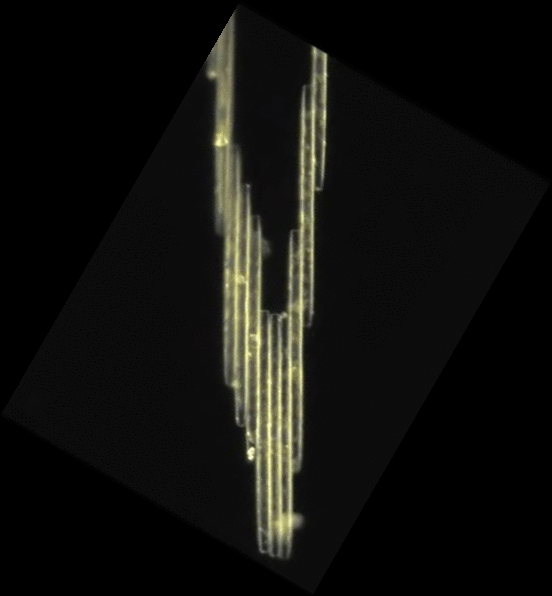

In [80]:
img_path = '/content/drive/MyDrive/aaaa/frame1662.png'

img=cv2.imread(img_path)


#img = cv2.medianBlur(img[:,:,:3], 9)
cv2_imshow(img)
img =torch.tensor(np.array(img), device=device)

# Define Functions for Algorithm

In [81]:
def compute_centroid(member, x, device):
  centers = torch.zeros((member.shape[-1],x.shape[-1]), device=device)
  member_sqr = torch.square(member)
  membr_sqr_sum = member_sqr.sum(axis=1).sum(axis=0)
  for i in range(member.shape[-1]):
    for j in range(x.shape[-1]):
      centers[i,j] =(torch.sum(member_sqr[:,:,i]* x[:,:,j]))/ membr_sqr_sum[i]
  return centers


def update_member(x, centers, member, device):
  dist_mat = torch.zeros(member.shape, device=device)
  for i in range(centers.shape[0]):
    center = torch.reshape(centers[i],(1,1,centers.shape[1]))
    dist_mat[:,:,i] = ((img - center)**2).sum(axis=-1)

  for i in range(centers.shape[0]):
    member[:,:,i] = dist_mat[:,:,i]/(dist_mat[:,:,:]).sum(axis=-1)

  return member
 

def FCM(img, iter, k=2, device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')):
  member = torch.tensor(np.random.dirichlet(np.ones(k),size=img.shape[:2]), device=device)
  centers = torch.zeros((member.shape[-1],img.shape[-1]), device=device)
  for i in range(centers.shape[0]):
    center = torch.reshape(centers[i],(1,1,centers.shape[1]))
    dist = ((img - center)**2).sum(axis=-1)

  for temp in range(iter):
    centers = compute_centroid(member, img, device)
    member = update_member(img, centers, member, device)
    print(temp)
  return member.to(device="cpu"), centers.to(device="cpu")
  

In [82]:
startTime = time.time()
member,centers = FCM(img, iter=25, k=2)  
endTime = time.time()
print("exection time :" +str(endTime-startTime))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
exection time :0.07589292526245117


# Visulize Results

You should change the cluster value accordingly as they are initializing randomly.

ie.

```
cluster = 1
```



<bound method Figure.show of <Figure size 1440x1440 with 4 Axes>>

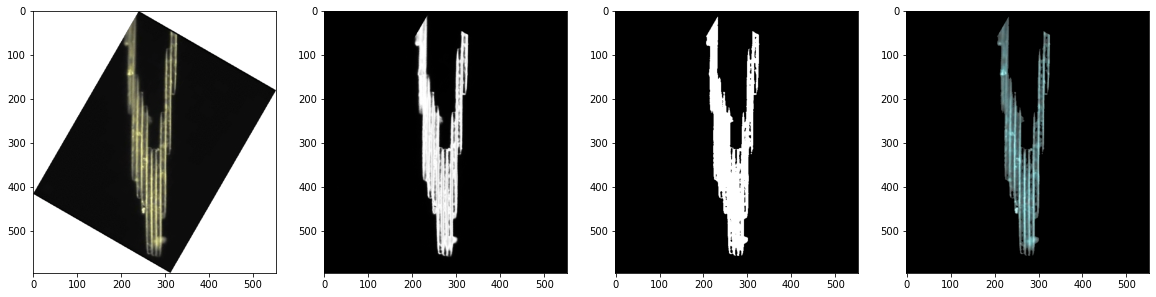

In [84]:
cluster = 1  # cluster number which is to be visualize
img = img.to(device="cpu")
fig,ax = plt.subplots(1,4,figsize=(20,20))
ax[0].imshow(imge)
ax[1].imshow(255-255*member[:,:,cluster],'gray')

temp = torch.where(member[:,:,cluster]>0.5,0,255)
ax[2].imshow(temp,'gray')
temp = torch.reshape(temp, (temp.shape[0], temp.shape[1], 1))
mask = img*temp
mask = np.where(mask==0,0,img)
ax[3].imshow(mask)
fig.show